In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data acquisition

In [ ]:
production_logs = pd.read_csv('/content/drive/MyDrive/RBAC/Datasets/production_logs.csv')
cross_reference = pd.read_csv('/content/drive/MyDrive/RBAC/Datasets/cross_reference.csv')
maintenance_order = pd.read_csv('/content/drive/MyDrive/RBAC/Datasets/maintenance_order.csv')

# Overview

## Null values

In [ ]:
for df in [production_logs, cross_reference, maintenance_order]:
  print(df.isnull().sum())
  print('-'*100)


PRODUCTIONDATE_DAY_LOC           0
SHIFT_NAME                       0
LINE_NAME                        0
CO_TYPE                      22770
CREW_ID                        159
AE_MODEL_CATEGORY            19554
SIZE_TYPE                    62997
SHIFT_NAME.1                     0
UTIL_REASON_DESCRIPTION      19554
DOWNTIME                         0
EFFECTIVE_RUNTIME            62997
GOOD_PRODUCTION_QTY              0
LUNCH_AND_BREAK                  0
MEETING_AND_TRAINING             0
NO_DEMAND                        0
PLANT_AVAILABLE_TIME             0
PLANT_EXPERIMENTATION            0
PRODUCTION_AVAILABLE_TIME        0
REJECT_PRODUCTION_QTY            0
RUN_TIME                         0
CHANGEOVER_DURATION              0
CLEANING_AND_SANITIZATION        0
BUSINESS_EXTERNAL_TIME           0
PLANNED_MAINTENANCE              0
TOTAL_TIME                       0
WAITING_TIME                     0
PRODUCTION_ORDER_RATE        62997
dtype: int64
------------------------------------------

## Duplicated values

In [ ]:
for df in [production_logs, cross_reference, maintenance_order]:
  print(df.duplicated().sum())
  print('-'*100)

0
----------------------------------------------------------------------------------------------------
0
----------------------------------------------------------------------------------------------------
194
----------------------------------------------------------------------------------------------------


## Distribution

### Production logs

,0
DOWNTIME,"Axes(0.125,0.747241;0.168478x0.132759)"
EFFECTIVE_RUNTIME,"Axes(0.327174,0.747241;0.168478x0.132759)"
GOOD_PRODUCTION_QTY,"Axes(0.529348,0.747241;0.168478x0.132759)"
LUNCH_AND_BREAK,"Axes(0.731522,0.747241;0.168478x0.132759)"
MEETING_AND_TRAINING,"Axes(0.125,0.587931;0.168478x0.132759)"
NO_DEMAND,"Axes(0.327174,0.587931;0.168478x0.132759)"
PLANT_AVAILABLE_TIME,"Axes(0.529348,0.587931;0.168478x0.132759)"
PLANT_EXPERIMENTATION,"Axes(0.731522,0.587931;0.168478x0.132759)"
PRODUCTION_AVAILABLE_TIME,"Axes(0.125,0.428621;0.168478x0.132759)"
REJECT_PRODUCTION_QTY,"Axes(0.327174,0.428621;0.168478x0.132759)"


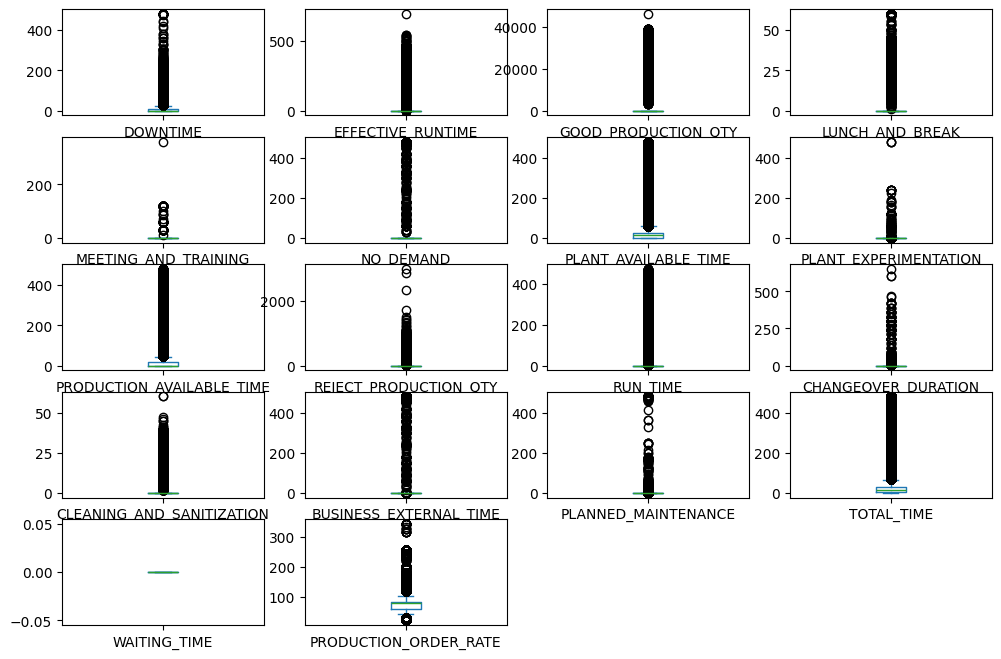

In [ ]:
production_logs.select_dtypes(include='number').plot(kind='box', subplots=True, layout=(5,4), figsize=(12, 8), sharex=False)


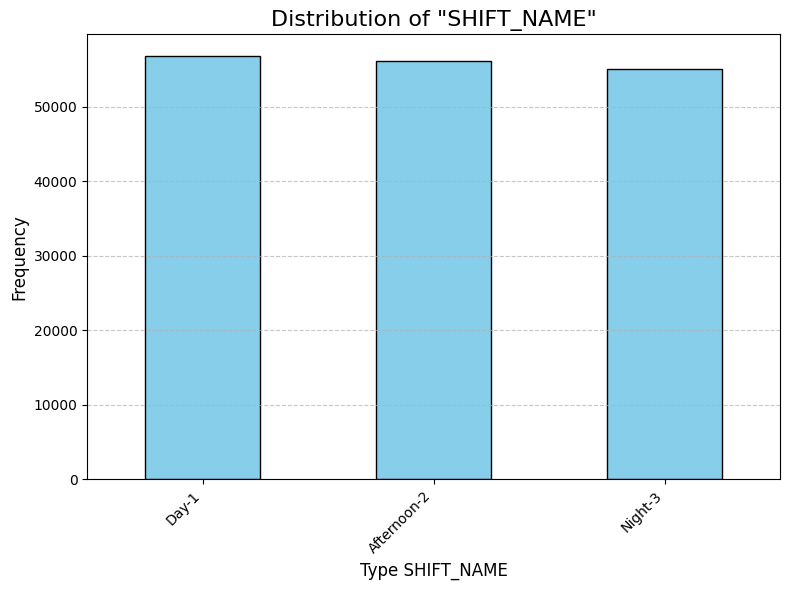

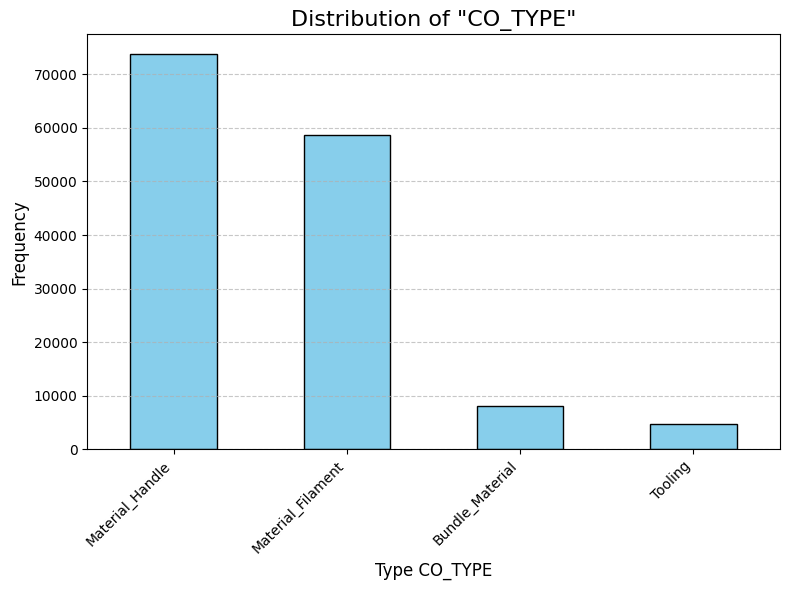

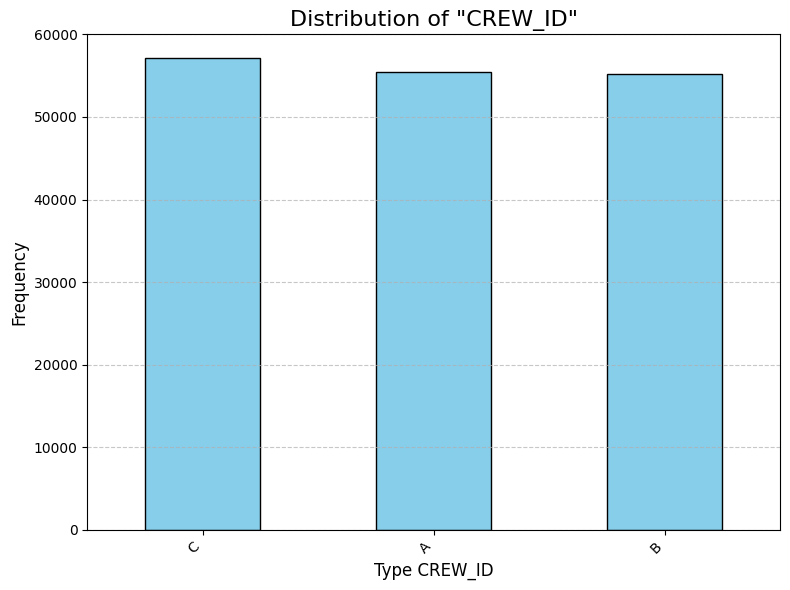

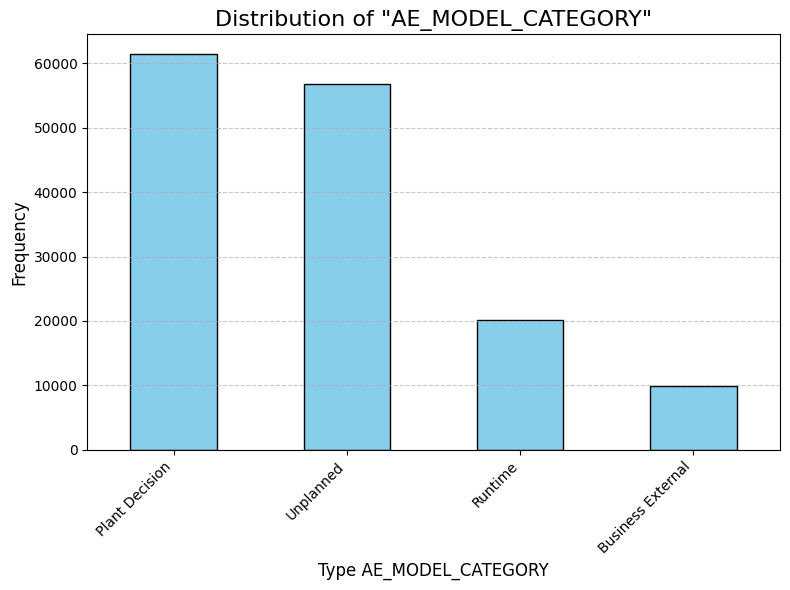

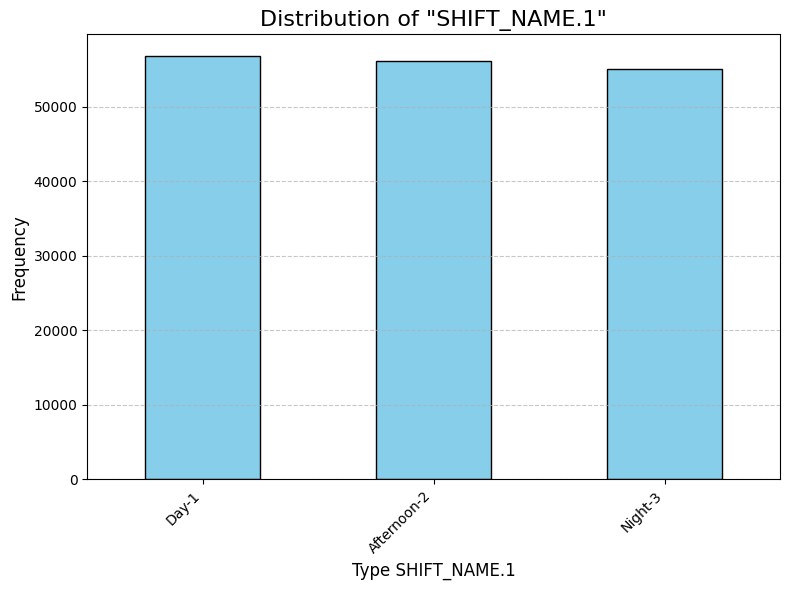

In [ ]:
object_cols = production_logs.select_dtypes(include='object')
categorical_cols = []

threshold = 20

for col in object_cols.columns:
    unique_count = object_cols[col].nunique()
    if unique_count < threshold:
        categorical_cols.append(col)


for col in categorical_cols:
    value_counts = production_logs[col].value_counts()

    plt.figure(figsize=(8, 6))

    value_counts.plot(kind='bar', color='skyblue', edgecolor='black')

    plt.title(f'Distribution of "{col}"', fontsize=16)
    plt.ylabel('Frequency', fontsize=12)
    plt.xlabel(f'Type {col}', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()

    plt.show()

In [ ]:
production_logs.select_dtypes(include='number').describe()

,DOWNTIME,EFFECTIVE_RUNTIME,GOOD_PRODUCTION_QTY,LUNCH_AND_BREAK,MEETING_AND_TRAINING,NO_DEMAND,PLANT_AVAILABLE_TIME,PLANT_EXPERIMENTATION,PRODUCTION_AVAILABLE_TIME,REJECT_PRODUCTION_QTY,RUN_TIME,CHANGEOVER_DURATION,CLEANING_AND_SANITIZATION,BUSINESS_EXTERNAL_TIME,PLANNED_MAINTENANCE,TOTAL_TIME,WAITING_TIME,PRODUCTION_ORDER_RATE
count,167946.000000,104949.000000,167946.000000,167946.000000,167946.000000,167946.000000,167946.000000,167946.000000,167946.000000,167946.000000,167946.000000,167946.000000,167946.000000,167946.000000,167946.000000,167946.000000,167946.0,104949.000000
mean,7.572720,65.493781,2643.169007,1.808498,0.076078,12.625612,54.851941,0.105331,48.985317,43.061591,41.412597,0.684952,1.812386,27.400212,1.186893,82.252152,0.0,77.033820
std,19.749306,141.856646,7938.138519,7.190068,2.864279,76.120952,115.305862,3.341618,116.081637,132.031162,117.098792,8.527059,5.487821,110.828209,15.107859,150.241160,0.0,41.525277
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,20.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.0,60.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,0.0,78.900000
75%,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,30.000000,0.0,81.400000
max,480.000000,695.652174,46100.000000,60.000000,360.000000,480.000000,480.000000,480.000000,480.000000,3000.000000,473.000000,650.000000,60.000000,480.000000,480.000000,480.000000,0.0,344.000000


In [ ]:
print(pd.to_datetime(production_logs['PRODUCTIONDATE_DAY_LOC']).min())
print(pd.to_datetime(production_logs['PRODUCTIONDATE_DAY_LOC']).max())

2025-01-01 00:00:00
2025-06-30 00:00:00


<Axes: xlabel='PRODUCTIONDATE_DAY_LOC', ylabel='Count'>

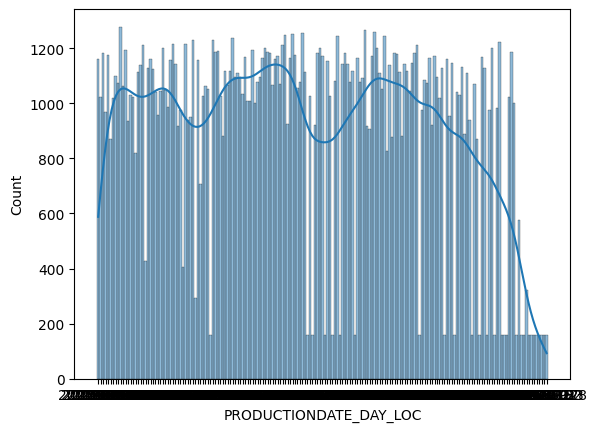

In [ ]:
sns.histplot(data= production_logs, x = 'PRODUCTIONDATE_DAY_LOC', kde=True)

### Cross reference

,0
EQUIPMENT_ID,"Axes(0.125,0.747241;0.168478x0.132759)"


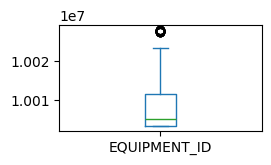

In [ ]:
cross_reference.select_dtypes(include='number').plot(kind='box', subplots=True, layout=(5,4), figsize=(12, 8), sharex=False)


array([<Axes: ylabel='Density'>], dtype=object)

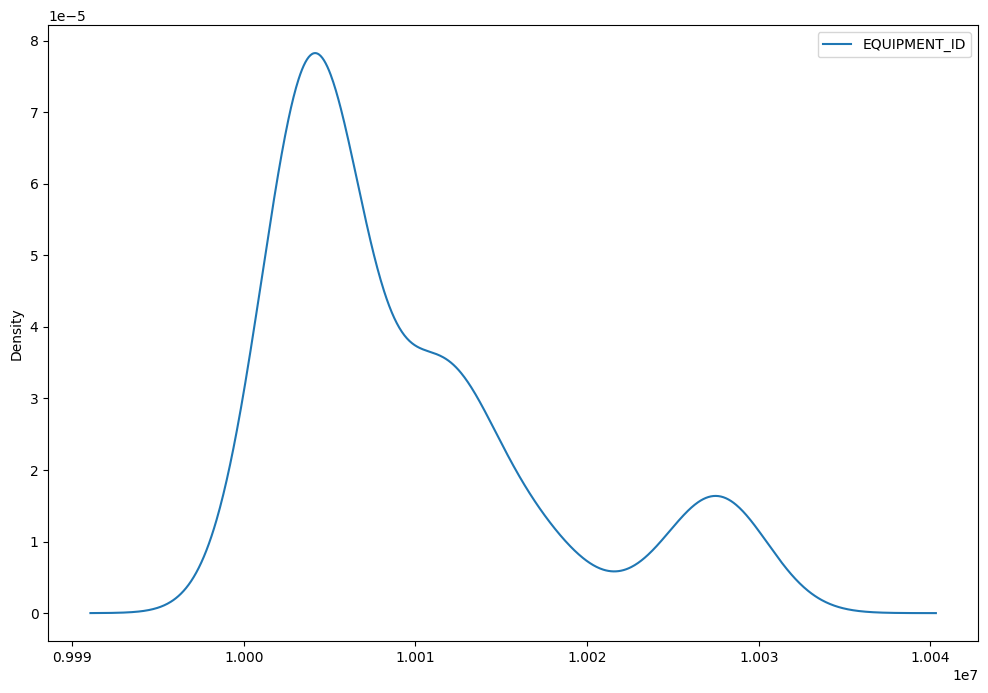

In [ ]:
cross_reference.select_dtypes(include='number').plot(kind='density', subplots=True, figsize=(12, 8), sharex=False)


In [ ]:
cross_reference['OPERA NAME'].value_counts()


,count
OPERA NAME,
MHPT2306,2
MHPT2307,2
MHPT2304,2
MHPT2303,2
MHPT2301,2
...,...
MKFX2102,1
MKTU0406,1
MAFT2205,1


In [ ]:
cross_reference.select_dtypes('number').describe().T

,count,mean,std,min,25%,50%,75%,max
EQUIPMENT_ID,158.0,1.000960e+07,7933.48559,10003380.0,10003419.25,10005195.5,10011710.75,10028007.0


### Maintenance order

In [ ]:
maintenance_order.columns

Index(['ORDER', 'BASIC_START_DATE', 'EQUIPMENT_ID', 'ORDER_TYPE',
       'DESCRIPTION'],
      dtype='object')

,0
ORDER,"Axes(0.125,0.11;0.352273x0.77)"
EQUIPMENT_ID,"Axes(0.547727,0.11;0.352273x0.77)"


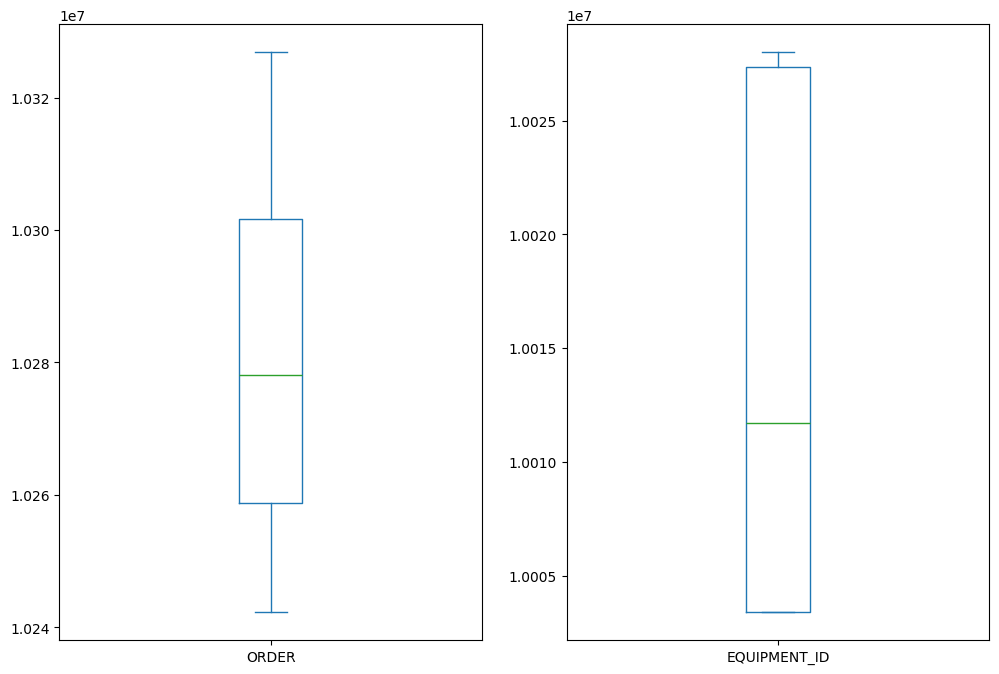

In [ ]:
maintenance_order.select_dtypes(include='number').plot(kind='box', subplots=True, figsize=(12, 8), sharex=False)


array([<Axes: ylabel='Density'>, <Axes: ylabel='Density'>], dtype=object)

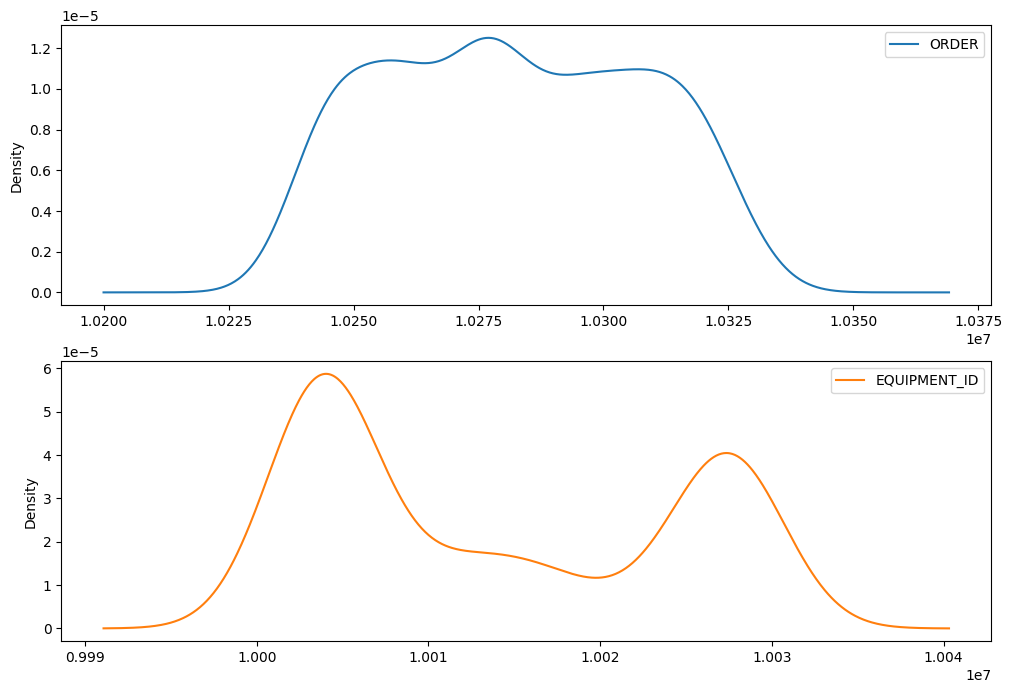

In [ ]:
maintenance_order.select_dtypes(include='number').plot(kind='density', subplots=True, figsize=(12, 8), sharex=False)


In [ ]:
cross_reference['OPERA NAME'].value_counts()


,count
OPERA NAME,
MHPT2306,2
MHPT2307,2
MHPT2304,2
MHPT2303,2
MHPT2301,2
...,...
MKFX2102,1
MKTU0406,1
MAFT2205,1


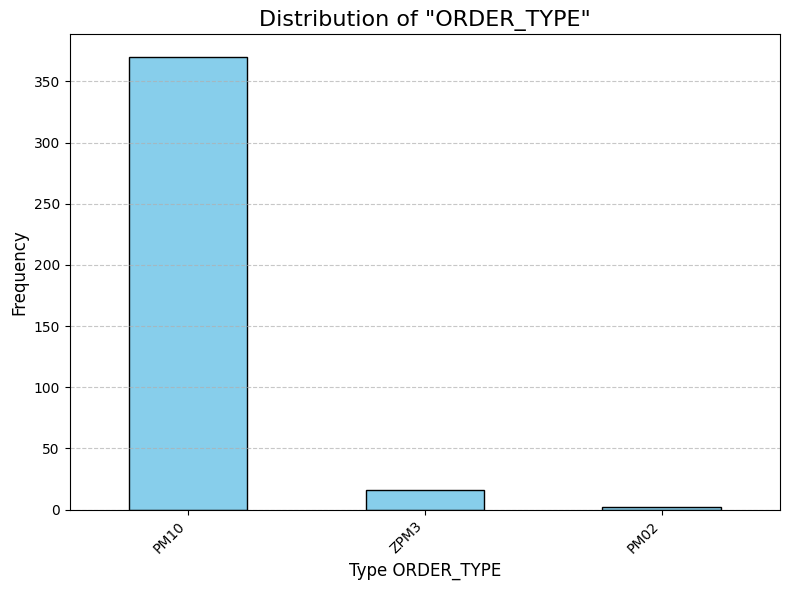

In [ ]:
object_cols = maintenance_order.select_dtypes(include='object')
categorical_cols = []

threshold = 20

for col in object_cols.columns:
    unique_count = object_cols[col].nunique()
    if unique_count < threshold:
        categorical_cols.append(col)


for col in categorical_cols:
    value_counts = maintenance_order[col].value_counts()

    plt.figure(figsize=(8, 6))

    value_counts.plot(kind='bar', color='skyblue', edgecolor='black')

    plt.title(f'Distribution of "{col}"', fontsize=16)
    plt.ylabel('Frequency', fontsize=12)
    plt.xlabel(f'Type {col}', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()

    plt.show()

In [ ]:
maintenance_order.select_dtypes('number').describe()

,ORDER,EQUIPMENT_ID
count,3.880000e+02,3.880000e+02
mean,1.028193e+07,1.001377e+07
std,2.537537e+04,1.047855e+04
min,1.024227e+07,1.000339e+07
25%,1.025874e+07,1.000342e+07
50%,1.027806e+07,1.001170e+07
75%,1.030168e+07,1.002736e+07
max,1.032684e+07,1.002800e+07


In [ ]:
object_cols = maintenance_order.select_dtypes(include='object')
object_cols

,BASIC_START_DATE,ORDER_TYPE,DESCRIPTION
0,2025-08-29,PM10,RM TF1E0701
1,2025-08-29,PM10,RM TF1E0701
2,2025-08-26,PM10,RM TF1HPT04
3,2025-08-26,PM10,RM TF1HPT04
4,2025-04-05,PM10,RM TF1E0702
...,...,...,...
383,2025-03-12,PM10,RM TF1FLX01
384,2025-03-19,PM10,RM TF1FLX02
385,2025-03-19,PM10,RM TF1FLX02
386,2025-03-10,PM10,RM TF1HPT05


In [ ]:
print(pd.to_datetime(maintenance_order['BASIC_START_DATE']).min())
print(pd.to_datetime(maintenance_order['BASIC_START_DATE']).max())

2025-02-10 00:00:00
2025-08-29 00:00:00


<Axes: xlabel='BASIC_START_DATE', ylabel='Count'>

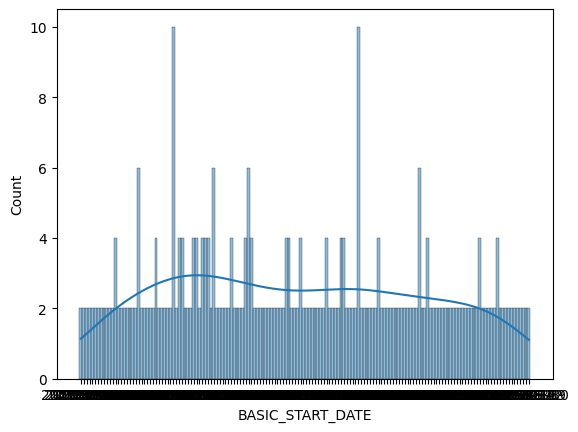

In [ ]:
sns.histplot(data= maintenance_order, x = 'BASIC_START_DATE', kde=True)

# Object values in all datasets

In [ ]:
def extract_object_columns_values(datasets: dict) -> dict:

    all_object_columns = {}

    for name, df in datasets.items():
        print(f"Handling dataset: '{name}'...")

        object_cols = df.select_dtypes(include='object')

        dataset_results = {}

        for col_name in object_cols.columns:
            # Extract unique values and change to list
            unique_values = object_cols[col_name].unique().tolist()
            dataset_results[col_name] = unique_values

        all_object_columns[name] = dataset_results

    return all_object_columns

def print_readable_format(results: dict):

    print("\n✅--- VALUES ---✅")

    for dataset_name, columns in results.items():
        print(f"\n=========================================")
        print(f"📊 Dataset: {dataset_name}")
        print(f"=========================================")

        if not columns:
            print("   (No object column)")
            continue

        for col_name, unique_values in columns.items():
            print(f"\n  ▶️ Column: '{col_name}'")
            # Print unique values
            for value in unique_values:
                print(f"     - {value}")
    print("\n")

my_datasets = {
    'production_logs': production_logs.drop(columns='PRODUCTIONDATE_DAY_LOC'),
    'cross_reference': cross_reference,
    'maintenance_order': maintenance_order.drop(columns = 'BASIC_START_DATE')
}

final_results = extract_object_columns_values(my_datasets)

Handling dataset: 'production_logs'...
Handling dataset: 'cross_reference'...
Handling dataset: 'maintenance_order'...


In [ ]:
print_readable_format(final_results)


✅--- VALUES ---✅

📊 Dataset: production_logs

  ▶️ Column: 'SHIFT_NAME'
     - Night-3
     - Afternoon-2
     - Day-1

  ▶️ Column: 'LINE_NAME'
     - MKBC0202
     - MKZA1601
     - MKZA1401
     - MHPT2304
     - MKZA1701
     - MKFX2101
     - MKBC1001
     - MKBC0502
     - MKBC0201
     - MHPT2301
     - MKTU2005
     - MKBC1201
     - MHPT2303
     - MKBC1202
     - MKZA1702
     - MKBC0702
     - MKZA1402
     - MAFT2205
     - MKZA1602
     - MKBC0901
     - MKBC0602
     - MKBC0102
     - MKBC0601
     - MKZA1501
     - MKTU2006
     - MKBC1002
     - MKTU2004
     - MKBC0701
     - MHPT2305
     - MKBC0302
     - MKBC0402
     - MKTU2002
     - MHPT2306
     - MAFT2203
     - MKZA1801
     - MKBC0301
     - MKBC0902
     - MKBC1102
     - MKZA1802
     - MKBC0101
     - MHPT2302
     - MKBC0501
     - MAFT2201
     - MHPT2307
     - MKZA1502
     - MKTU2003
     - MKBC1301
     - MKTU2001
     - MKBC1101
     - MKBC0401
     - MAFT2204
     - MKFX2102
     - MAFT2202

  ▶️ 

In [ ]:
import json
print("\n--- VALUES ---")
print(json.dumps(final_results, indent=4))


--- VALUES ---
{
    "production_logs": {
        "SHIFT_NAME": [
            "Night-3",
            "Afternoon-2",
            "Day-1"
        ],
        "LINE_NAME": [
            "MKBC0202",
            "MKZA1601",
            "MKZA1401",
            "MHPT2304",
            "MKZA1701",
            "MKFX2101",
            "MKBC1001",
            "MKBC0502",
            "MKBC0201",
            "MHPT2301",
            "MKTU2005",
            "MKBC1201",
            "MHPT2303",
            "MKBC1202",
            "MKZA1702",
            "MKBC0702",
            "MKZA1402",
            "MAFT2205",
            "MKZA1602",
            "MKBC0901",
            "MKBC0602",
            "MKBC0102",
            "MKBC0601",
            "MKZA1501",
            "MKTU2006",
            "MKBC1002",
            "MKTU2004",
            "MKBC0701",
            "MHPT2305",
            "MKBC0302",
            "MKBC0402",
            "MKTU2002",
            "MHPT2306",
            "MAFT2203",
            "

# EDA on cross_reference


In [ ]:
cross_reference.head()

,EQUIPMENT_ID,OPERA NAME
0,10003380,MKTU0101
1,10003381,MKTU0102
2,10003382,MKTU0103
3,10003383,MKTU0104
4,10003384,MKTU0105


In [ ]:
cross_reference.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   EQUIPMENT_ID  158 non-null    int64 
 1   OPERA NAME    158 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.6+ KB


In [ ]:
cross_reference.duplicated().sum()

np.int64(0)

In [ ]:
cross_reference.isnull().sum()

,0
EQUIPMENT_ID,0
OPERA NAME,0


In [ ]:
cross_reference.describe()

,EQUIPMENT_ID
count,1.580000e+02
mean,1.000960e+07
std,7.933486e+03
min,1.000338e+07
25%,1.000342e+07
50%,1.000520e+07
75%,1.001171e+07
max,1.002801e+07


In [ ]:
cross_reference['EQUIPMENT_ID'].value_counts().sort_index()

,count
EQUIPMENT_ID,
10003380,1
10003381,1
10003382,1
10003383,1
10003384,1
...,...
10027691,1
10028002,1
10028003,1


So, each entries has a unique equipment ID


In [ ]:
cross_reference['EQUIPMENT_ID'].values

array([10003380, 10003381, 10003382, 10003383, 10003384, 10003385,
       10003386, 10003387, 10003388, 10003389, 10003390, 10003391,
       10003392, 10003393, 10003394, 10003395, 10003396, 10003397,
       10003398, 10003399, 10003400, 10003401, 10003402, 10003403,
       10003404, 10003405, 10003406, 10003407, 10003408, 10003409,
       10003410, 10003411, 10003412, 10003413, 10003414, 10003415,
       10003416, 10003417, 10003418, 10003419, 10003420, 10003421,
       10003422, 10003423, 10003424, 10003425, 10003426, 10003427,
       10003428, 10003429, 10003430, 10003431, 10004171, 10004172,
       10004173, 10004174, 10004175, 10004176, 10004177, 10004178,
       10004567, 10004568, 10004569, 10004570, 10004571, 10004572,
       10004573, 10004574, 10005185, 10005186, 10005187, 10005188,
       10005189, 10005190, 10005191, 10005192, 10005193, 10005194,
       10005195, 10005196, 10005197, 10005198, 10005199, 10005200,
       10005624, 10005625, 10005626, 10005627, 10005628, 10005

In [ ]:
cross_reference['EQUIPMENT_ID'].max() - cross_reference['EQUIPMENT_ID'].min() + 1

24628

So, not the IDs of equipments do not appear in a discrete, pre-defined order of numbers. This could be due to some equipments be removed from the list of equipments (disabled)

## OPERA NAME

In [ ]:
cross_reference['OPERA NAME'].value_counts(dropna = False)

,count
OPERA NAME,
MHPT2306,2
MHPT2307,2
MHPT2304,2
MHPT2303,2
MHPT2301,2
...,...
MKFX2102,1
MKTU0406,1
MAFT2205,1


In [ ]:
cross_reference['OPERA NAME'].values

array(['MKTU0101', 'MKTU0102', 'MKTU0103', 'MKTU0104', 'MKTU0105',
       'MKTU0106', 'MKBC0101', 'MKBC0102', 'MKTU0201', 'MKTU0202',
       'MKTU0203', 'MKTU0204', 'MKTU0205', 'MKTU0206', 'MKBC0201',
       'MKBC0202', 'MKTU0301', 'MKTU0302', 'MKTU0303', 'MKTU0304',
       'MKTU0305', 'MKTU0306', 'MKBC0301', 'MKBC0302', 'MKTU2001',
       'MKTU2002', 'MKTU2003', 'MKTU2004', 'MKTU2005', 'MKTU2006',
       'MKBC0401', 'MKBC0402', 'MKTU0501', 'MKTU0502', 'MKTU0503',
       'MKTU0504', 'MKTU0505', 'MKTU0506', 'MKBC0501', 'MKBC0502',
       'MKTU0601', 'MKTU0602', 'MKTU0603', 'MKTU0604', 'MKTU0605',
       'MKTU0606', 'MKBC0601', 'MKBC0602', 'MKTU1104', 'MKTU1105',
       'MKTU1106', 'MKBC1102', 'MKTU0901', 'MKTU0902', 'MKTU0903',
       'MKTU0904', 'MKTU0905', 'MKTU0906', 'MKBC0901', 'MKBC0902',
       'MKTU1001', 'MKTU1002', 'MKTU1003', 'MKTU1004', 'MKTU1005',
       'MKTU1006', 'MKBC1001', 'MKBC1002', 'MKTU1101', 'MKTU1102',
       'MKTU1103', 'MKBC1101', 'MKTU1301', 'MKTU1302', 'MKTU13

In [ ]:
cross_reference['OPERA NAME'].shape

(158,)

In [ ]:
cross_reference_copy = cross_reference.copy()
cross_reference_copy['OPERA_NAME_STR_CODE'] = cross_reference_copy['OPERA NAME'].str[:4]
cross_reference_copy['OPERA_NAME_NUM_CODE'] = cross_reference_copy['OPERA NAME'].str[-4:]


In [ ]:
cross_reference_copy['OPERA_NAME_STR_CODE'].value_counts(dropna = False)

,count
OPERA_NAME_STR_CODE,
MKTU,75
MKTZ,30
MKBC,23
MHPT,13
MKZA,10
MAFT,5
MKFX,2


In [ ]:
cross_reference_copy['OPERA_NAME_NUM_CODE'].value_counts(dropna = False)

,count
OPERA_NAME_NUM_CODE,
0101,2
0102,2
0201,2
0301,2
0302,2
...,...
2102,1
0406,1
2205,1


In [ ]:
print(sorted(cross_reference_copy['OPERA_NAME_NUM_CODE'].unique()))


['0101', '0102', '0103', '0104', '0105', '0106', '0201', '0202', '0203', '0204', '0205', '0206', '0301', '0302', '0303', '0304', '0305', '0306', '0401', '0402', '0403', '0404', '0405', '0406', '0501', '0502', '0503', '0504', '0505', '0506', '0601', '0602', '0603', '0604', '0605', '0606', '0701', '0702', '0703', '0704', '0705', '0706', '0901', '0902', '0903', '0904', '0905', '0906', '1001', '1002', '1003', '1004', '1005', '1006', '1101', '1102', '1103', '1104', '1105', '1106', '1201', '1202', '1203', '1204', '1205', '1206', '1301', '1302', '1303', '1401', '1402', '1403', '1404', '1405', '1406', '1501', '1502', '1503', '1504', '1505', '1506', '1601', '1602', '1603', '1604', '1605', '1606', '1701', '1702', '1703', '1704', '1705', '1706', '1801', '1802', '1803', '1804', '1805', '1806', '2001', '2002', '2003', '2004', '2005', '2006', '2101', '2102', '2201', '2202', '2203', '2204', '2205', '2301', '2302', '2303', '2304', '2305', '2306', '2307']


The structure of numbers in OPERA NAME seems to be XY with:
- X be in {01, 02, 03, ..., 23}, with the absence of '08' and '19'
- Y be in {01, 02, 03, ..., 06}, but if X = 13, only values {01, 02, 03} are available and if X = 21, only values {01, 02} are available, and if X = 22, Y = 06 is not available. An additional Y = 07 is recorded if X = 23

### Identify anomalies

In [ ]:
cross_reference_copy[cross_reference_copy['OPERA_NAME_NUM_CODE'] == '2307']

,EQUIPMENT_ID,OPERA NAME,OPERA_NAME_STR_CODE,OPERA_NAME_NUM_CODE
155,10028003,MHPT2307,MHPT,2307
157,10028007,MHPT2307,MHPT,2307


In [ ]:
cross_reference_copy[cross_reference_copy['OPERA_NAME_NUM_CODE'].str.startswith('22')]

,EQUIPMENT_ID,OPERA NAME,OPERA_NAME_STR_CODE,OPERA_NAME_NUM_CODE
143,10027384,MAFT2201,MAFT,2201
144,10027385,MAFT2202,MAFT,2202
145,10027679,MAFT2203,MAFT,2203
146,10027680,MAFT2204,MAFT,2204
147,10027681,MAFT2205,MAFT,2205


In [ ]:
cross_reference_copy[cross_reference_copy['OPERA_NAME_NUM_CODE'].str.startswith('21')]

,EQUIPMENT_ID,OPERA NAME,OPERA_NAME_STR_CODE,OPERA_NAME_NUM_CODE
138,10023510,MKFX2101,MKFX,2101
139,10023511,MKFX2102,MKFX,2102


In [ ]:
cross_reference_copy[cross_reference_copy['OPERA_NAME_NUM_CODE'].str.startswith('13')]

,EQUIPMENT_ID,OPERA NAME,OPERA_NAME_STR_CODE,OPERA_NAME_NUM_CODE
72,10005189,MKTU1301,MKTU,1301
73,10005190,MKTU1302,MKTU,1302
74,10005191,MKTU1303,MKTU,1303
75,10005192,MKBC1301,MKBC,1301


In [ ]:
mapping = cross_reference_copy.groupby("EQUIPMENT_ID")["OPERA NAME"].nunique()
print(mapping)

EQUIPMENT_ID
10003380    1
10003381    1
10003382    1
10003383    1
10003384    1
           ..
10027691    1
10028002    1
10028003    1
10028004    1
10028007    1
Name: OPERA NAME, Length: 158, dtype: int64


So every EQUIPMENT_ID has a unique OPERA NAME

## Independence test

In [ ]:
from scipy.stats import chi2_contingency

contingency = pd.crosstab(cross_reference_copy["EQUIPMENT_ID"], cross_reference_copy["OPERA NAME"])

chi2, p, dof, expected = chi2_contingency(contingency)

print("Chi2 =", chi2)
print("p-value =", p)

Chi2 = 23857.999999999985
p-value = 0.24350987636781002


In [ ]:
from scipy.stats import chi2_contingency

contingency = pd.crosstab(cross_reference_copy["EQUIPMENT_ID"], cross_reference_copy["OPERA_NAME_NUM_CODE"])

chi2, p, dof, expected = chi2_contingency(contingency)

print("Chi2 =", chi2)
print("p-value =", p)

Chi2 = 18643.999999999996
p-value = 0.2692156075638536


In [ ]:
from scipy.stats import chi2_contingency

contingency = pd.crosstab(cross_reference_copy["EQUIPMENT_ID"], cross_reference_copy["OPERA_NAME_STR_CODE"])

chi2, p, dof, expected = chi2_contingency(contingency)

print("Chi2 =", chi2)
print("p-value =", p)

Chi2 = 948.0
p-value = 0.43908394927081446


So, from 3 test, can't say there is a relation between EQUIPMENT_ID and OPERA NAME, or OPERA NAME's contents

# EDA on production_logs

In [ ]:
production_logs.head()

,PRODUCTIONDATE_DAY_LOC,SHIFT_NAME,LINE_NAME,CO_TYPE,CREW_ID,AE_MODEL_CATEGORY,SIZE_TYPE,SHIFT_NAME.1,UTIL_REASON_DESCRIPTION,DOWNTIME,...,PRODUCTION_AVAILABLE_TIME,REJECT_PRODUCTION_QTY,RUN_TIME,CHANGEOVER_DURATION,CLEANING_AND_SANITIZATION,BUSINESS_EXTERNAL_TIME,PLANNED_MAINTENANCE,TOTAL_TIME,WAITING_TIME,PRODUCTION_ORDER_RATE
0,2025-05-26,Night-3,MKBC0202,Material_Filament,A,Runtime,Pro-Clean 5000,Night-3,Running,0,...,331,0,331,0,0,0,0,331,0,244.20
1,2025-06-21,Night-3,MKZA1601,Material_Handle,A,Runtime,Precision Grip 2.0,Night-3,Running,0,...,269,0,269,0,0,0,0,269,0,67.00
2,2025-04-01,Night-3,MKZA1401,Material_Filament,B,Runtime,ActiveClean Guard,Night-3,Running,0,...,398,0,398,0,0,0,0,398,0,134.00
3,2025-06-18,Night-3,MHPT2304,Material_Filament,A,Unplanned,Total Defense Shield,Night-3,18-Autofeeder - 1801-Double hadle on chain,15,...,15,0,0,0,0,0,0,15,0,63.16
4,2025-04-10,Night-3,MKZA1701,Material_Filament,A,Unplanned,Classic Clean 100,Night-3,16-Autosorter - 1601-Handle on chain stuck,12,...,12,0,0,0,0,0,0,12,0,67.00


In [ ]:
production_logs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167946 entries, 0 to 167945
Data columns (total 27 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   PRODUCTIONDATE_DAY_LOC     167946 non-null  object 
 1   SHIFT_NAME                 167946 non-null  object 
 2   LINE_NAME                  167946 non-null  object 
 3   CO_TYPE                    145176 non-null  object 
 4   CREW_ID                    167787 non-null  object 
 5   AE_MODEL_CATEGORY          148392 non-null  object 
 6   SIZE_TYPE                  104949 non-null  object 
 7   SHIFT_NAME.1               167946 non-null  object 
 8   UTIL_REASON_DESCRIPTION    148392 non-null  object 
 9   DOWNTIME                   167946 non-null  int64  
 10  EFFECTIVE_RUNTIME          104949 non-null  float64
 11  GOOD_PRODUCTION_QTY        167946 non-null  int64  
 12  LUNCH_AND_BREAK            167946 non-null  int64  
 13  MEETING_AND_TRAINING       16

In [ ]:
production_logs.duplicated().sum()

np.int64(0)

In [ ]:
production_logs.isnull().sum()

,0
PRODUCTIONDATE_DAY_LOC,0
SHIFT_NAME,0
LINE_NAME,0
CO_TYPE,22770
CREW_ID,159
AE_MODEL_CATEGORY,19554
SIZE_TYPE,62997
SHIFT_NAME.1,0
UTIL_REASON_DESCRIPTION,19554
DOWNTIME,0


In [ ]:
production_logs[production_logs['SHIFT_NAME'] != production_logs['SHIFT_NAME.1']].shape

(0, 27)

So SHIFT_NAME and SHIFT_NAME.1 save the same type of information, delete one of two

In [ ]:
production_logs_modified = production_logs.drop(columns = 'SHIFT_NAME.1')

## Null navigation

In [ ]:
production_logs[production_logs['AE_MODEL_CATEGORY'].isna() & production_logs['UTIL_REASON_DESCRIPTION'].isna()].shape

(19554, 27)

So every record that has a null value in AE_MODEL_CATEGORY will result in a null value in UTIL_REASON_DESCRIPTION.

In [ ]:
production_logs[production_logs['SIZE_TYPE'].isna() & production_logs['EFFECTIVE_RUNTIME'].isna() & production_logs['PRODUCTION_ORDER_RATE'].isna()].shape

(62997, 27)

So every record that has a null value in SIZE_TYPE will result in a null value in EFFECTIVE_RUNTIME and PRODUCTION_ORDER_DATE.

In [ ]:
production_logs[production_logs['SIZE_TYPE'].isna() & production_logs['EFFECTIVE_RUNTIME'].isna() & production_logs['PRODUCTION_ORDER_RATE'].isna()
& ~(production_logs['AE_MODEL_CATEGORY'].isna() & production_logs['UTIL_REASON_DESCRIPTION'].isna())].shape

(62997, 27)

So every record that has a null value in AE_MODEL_CATEGORY and UTIL_REASON_DESCRIPTION will not have a null value in SIZE_TYPE or EFFECTIVE_RUNTIME or PRODUCTION_ORDER_DATE.

In [ ]:
production_logs.loc[production_logs['SIZE_TYPE'].isna(),['SIZE_TYPE','AE_MODEL_CATEGORY','UTIL_REASON_DESCRIPTION']]

,SIZE_TYPE,AE_MODEL_CATEGORY,UTIL_REASON_DESCRIPTION
5,NaN,Plant Decision,Cleaning and Sanitation
6,NaN,Plant Decision,Cleaning and Sanitation
10,NaN,Business External,No Demand
11,NaN,Plant Decision,Planned Maintenance
14,NaN,Plant Decision,Cleaning and Sanitation
...,...,...,...
167938,NaN,Plant Decision,Cleaning and Sanitation
167941,NaN,Plant Decision,Lunch/Break
167943,NaN,Plant Decision,Planned Maintenance
167944,NaN,Plant Decision,Planned Maintenance


In [ ]:
production_logs.loc[production_logs['AE_MODEL_CATEGORY'] == 'Runtime',['SIZE_TYPE','AE_MODEL_CATEGORY','UTIL_REASON_DESCRIPTION']].isna().sum()

,0
SIZE_TYPE,0
AE_MODEL_CATEGORY,0
UTIL_REASON_DESCRIPTION,0


In [ ]:
production_logs.loc[production_logs['AE_MODEL_CATEGORY'] != 'Runtime',['SIZE_TYPE','AE_MODEL_CATEGORY','UTIL_REASON_DESCRIPTION']].isna().sum()

,0
SIZE_TYPE,62997
AE_MODEL_CATEGORY,19554
UTIL_REASON_DESCRIPTION,19554


It can be explained that if the line is not running (AE_MODEL_CATEGORY != Runtime), then no product is on the line, so the information about SIZE_TYPE will be empty

In [ ]:
not_running = production_logs_modified[production_logs_modified['AE_MODEL_CATEGORY'] != 'Runtime']

## Not running machines

In [ ]:
not_running.shape

(147773, 26)

In [ ]:
not_running.isna().sum()

,0
PRODUCTIONDATE_DAY_LOC,0
SHIFT_NAME,0
LINE_NAME,0
CO_TYPE,22322
CREW_ID,159
AE_MODEL_CATEGORY,19554
SIZE_TYPE,62997
UTIL_REASON_DESCRIPTION,19554
DOWNTIME,0
EFFECTIVE_RUNTIME,62997


In [ ]:
not_running['AE_MODEL_CATEGORY'].value_counts(dropna = False)

,count
AE_MODEL_CATEGORY,
Plant Decision,61424
Unplanned,56836
NaN,19554
Business External,9959


In [ ]:
stop_running = not_running[not_running['AE_MODEL_CATEGORY'].notna()]

In [ ]:
unknown_reason = not_running[not_running['AE_MODEL_CATEGORY'].isna()]

In [ ]:
print(stop_running.shape)
print(unknown_reason.shape)
print(not_running.shape)

(128219, 26)
(19554, 26)
(147773, 26)


### Stop machines

In [ ]:
stop_running.shape

(128219, 26)

In [ ]:
stop_running.isna().sum()

,0
PRODUCTIONDATE_DAY_LOC,0
SHIFT_NAME,0
LINE_NAME,0
CO_TYPE,2768
CREW_ID,159
AE_MODEL_CATEGORY,0
SIZE_TYPE,62997
UTIL_REASON_DESCRIPTION,0
DOWNTIME,0
EFFECTIVE_RUNTIME,62997


In [ ]:
stop_running.loc[stop_running['SIZE_TYPE'].isna(),['RUN_TIME']].value_counts(dropna = False)

,count
RUN_TIME,
0,62997


In [ ]:
stop_running.loc[stop_running['SIZE_TYPE'].isna(),['PRODUCTION_AVAILABLE_TIME']].value_counts(dropna = False)

,count
PRODUCTION_AVAILABLE_TIME,
0,62997


In [ ]:
stop_running.loc[stop_running['SIZE_TYPE'].isna(),['GOOD_PRODUCTION_QTY']].value_counts(dropna = False)

,count
GOOD_PRODUCTION_QTY,
0,62997


So, it is clear that during stop time, no products is manufactured, hence, all SIZE_TYPE become nulls. We will impute these null values using 'NO_PRODUCT' flag

In [ ]:
production_logs_modified['SIZE_TYPE'] = production_logs_modified['SIZE_TYPE'].fillna('NO_PRODUCT')

In [ ]:
production_logs_modified['PRODUCTION_ORDER_RATE'] = production_logs_modified['PRODUCTION_ORDER_RATE'].fillna(0)
production_logs_modified['EFFECTIVE_RUNTIME'] = production_logs_modified['EFFECTIVE_RUNTIME'].fillna(0)

In [ ]:
production_logs_modified.isna().sum()

,0
PRODUCTIONDATE_DAY_LOC,0
SHIFT_NAME,0
LINE_NAME,0
CO_TYPE,22770
CREW_ID,159
AE_MODEL_CATEGORY,19554
SIZE_TYPE,0
UTIL_REASON_DESCRIPTION,19554
DOWNTIME,0
EFFECTIVE_RUNTIME,0


Update stop_running, not_running, unknown_reason

In [ ]:
not_running = production_logs_modified[production_logs_modified['AE_MODEL_CATEGORY'] != 'Runtime']
stop_running = not_running[not_running['AE_MODEL_CATEGORY'].notna()]
unknown_reason = not_running[not_running['AE_MODEL_CATEGORY'].isna()]

### Unknown reasons

In [ ]:
unknown_reason.isna().sum()

,0
PRODUCTIONDATE_DAY_LOC,0
SHIFT_NAME,0
LINE_NAME,0
CO_TYPE,19554
CREW_ID,0
AE_MODEL_CATEGORY,19554
SIZE_TYPE,0
UTIL_REASON_DESCRIPTION,19554
DOWNTIME,0
EFFECTIVE_RUNTIME,0


In [ ]:
unknown_reason.describe()

,DOWNTIME,EFFECTIVE_RUNTIME,GOOD_PRODUCTION_QTY,LUNCH_AND_BREAK,MEETING_AND_TRAINING,NO_DEMAND,PLANT_AVAILABLE_TIME,PLANT_EXPERIMENTATION,PRODUCTION_AVAILABLE_TIME,REJECT_PRODUCTION_QTY,RUN_TIME,CHANGEOVER_DURATION,CLEANING_AND_SANITIZATION,BUSINESS_EXTERNAL_TIME,PLANNED_MAINTENANCE,TOTAL_TIME,WAITING_TIME,PRODUCTION_ORDER_RATE
count,19554.0,19554.000000,19554.000000,19554.0,19554.0,19554.0,19554.0,19554.0,19554.0,19554.000000,19554.0,19554.0,19554.0,19554.0,19554.0,19554.0,19554.0,19554.000000
mean,0.0,351.514108,22701.731717,0.0,0.0,0.0,0.0,0.0,0.0,369.848727,0.0,0.0,0.0,0.0,0.0,0.0,0.0,94.593143
std,0.0,86.392865,9265.744523,0.0,0.0,0.0,0.0,0.0,0.0,169.885947,0.0,0.0,0.0,0.0,0.0,0.0,0.0,57.363725
min,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.000000
25%,0.0,316.360849,15605.000000,0.0,0.0,0.0,0.0,0.0,0.0,237.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60.000000
50%,0.0,377.906977,25100.000000,0.0,0.0,0.0,0.0,0.0,0.0,368.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,78.900000
75%,0.0,411.356147,30540.000000,0.0,0.0,0.0,0.0,0.0,0.0,495.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,134.000000
max,0.0,695.652174,46100.000000,0.0,0.0,0.0,0.0,0.0,0.0,3000.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,344.000000


In [ ]:
numeric_cols = unknown_reason.select_dtypes(include=["number"]).columns
nonzero_cols = [col for col in numeric_cols if (unknown_reason[col] != 0).any()]

In [ ]:
print(numeric_cols)
print(nonzero_cols)

Index(['DOWNTIME', 'EFFECTIVE_RUNTIME', 'GOOD_PRODUCTION_QTY',
       'LUNCH_AND_BREAK', 'MEETING_AND_TRAINING', 'NO_DEMAND',
       'PLANT_AVAILABLE_TIME', 'PLANT_EXPERIMENTATION',
       'PRODUCTION_AVAILABLE_TIME', 'REJECT_PRODUCTION_QTY', 'RUN_TIME',
       'CHANGEOVER_DURATION', 'CLEANING_AND_SANITIZATION',
       'BUSINESS_EXTERNAL_TIME', 'PLANNED_MAINTENANCE', 'TOTAL_TIME',
       'WAITING_TIME', 'PRODUCTION_ORDER_RATE'],
      dtype='object')
['EFFECTIVE_RUNTIME', 'GOOD_PRODUCTION_QTY', 'REJECT_PRODUCTION_QTY', 'PRODUCTION_ORDER_RATE']


Although there seems to be the machines are not running, but they are also not stopping, since the products are still being produced.

In [ ]:
production_logs_modified.duplicated(subset=["PRODUCTIONDATE_DAY_LOC", "SHIFT_NAME", "LINE_NAME", "CREW_ID", "SIZE_TYPE"]).any()

np.True_

In [ ]:
check_null_group = (
    production_logs_modified.groupby(["PRODUCTIONDATE_DAY_LOC", "SHIFT_NAME", "LINE_NAME", "CREW_ID", "SIZE_TYPE"])
    ["AE_MODEL_CATEGORY"]
    .agg(
        count_null=lambda x: x.isna().sum(),
        count_nonnull=lambda x: x.notna().sum(),
        total="count",
        unique_models=lambda x: x.nunique(dropna = False)
    )
    .reset_index()
)


In [ ]:
mixed_groups = check_null_group[
    (check_null_group["count_null"] > 0) &
    (check_null_group["count_nonnull"] > 0)
]

print("Groups that have both null and non-null values:", len(mixed_groups))


Groups that have both null and non-null values: 19554


In [ ]:
mixed_groups['unique_models'].value_counts()

,count
unique_models,
3,11426
4,7138
2,990


So, null values in AE_MODEL_CATEGORY can be of 3 types:
- Actual errors in collecting data
- Unregistered models
- A summary record for one specific group of ["PRODUCTIONDATE_DAY_LOC", "SHIFT_NAME", "LINE_NAME", "CREW_ID", "SIZE_TYPE"]
- Fragmented records

#### Fragmented records check

In [ ]:
group_n = mixed_groups[["PRODUCTIONDATE_DAY_LOC", "SHIFT_NAME", "LINE_NAME", "CREW_ID", "SIZE_TYPE"]].merge(production_logs_modified,
on = ["PRODUCTIONDATE_DAY_LOC", "SHIFT_NAME", "LINE_NAME", "CREW_ID", "SIZE_TYPE"]).sort_values(
    by = ["PRODUCTIONDATE_DAY_LOC", "SHIFT_NAME", "LINE_NAME", "CREW_ID", "SIZE_TYPE"])
num_cols = group_n.select_dtypes("number").columns.tolist()

def is_fragmented(g):
    # >=1 record AE_MODEL_CATEGORY = NULL
    if not g['AE_MODEL_CATEGORY'].isna().any() or len(g) < 2:
        return False

    numeric = g[num_cols].copy()

    # If all records are 0, no actual values
    if numeric.eq(0).all(axis=None):
        return False

    # Number of rows != 0
    nonzero_count = (numeric != 0).sum()

    # Fragmented if there are 2 columns that have data on different rows
    fragmented_pattern = (
        (nonzero_count > 0).sum() > 0 and
        (nonzero_count > 1).any()
    )

    return fragmented_pattern

group_cols = ["PRODUCTIONDATE_DAY_LOC", "SHIFT_NAME", "LINE_NAME", "CREW_ID", "SIZE_TYPE"]
fragmented_groups = (
    production_logs_modified.groupby(group_cols)
    .filter(is_fragmented)
)


In [ ]:
print(fragmented_groups.shape)
print(group_n.shape)

(104867, 26)
(104867, 26)


So, it is true that all null values in AE_MODEL_CATEGORY is due to fragmented data

In [ ]:
group_n.to_excel('group_n.xlsx', index=False)

In [ ]:
check_cols = ['EFFECTIVE_RUNTIME', 'GOOD_PRODUCTION_QTY', 'REJECT_PRODUCTION_QTY']

results = []

for name, group in production_logs_modified.groupby(group_cols):
    null_row = group[group['AE_MODEL_CATEGORY'].isnull()]

    if not null_row.empty:
        # There is a NULL row, check if all numeric columns have non-zero values
        has_values = (null_row[check_cols] != 0).all(axis=None)  # True if all columns have non-zero values
        # Select the Runtime row
        runtime_row = group[group['AE_MODEL_CATEGORY'] == 'Runtime']
        if not runtime_row.empty:
            # Check if all numeric columns in the Runtime row are zero
            is_zero = (runtime_row[check_cols] == 0).all(axis=None)
        else:
            is_zero = None  # No Runtime row in the group
        results.append({
            'group': name,
            'null_has_values': has_values,
            'runtime_is_zero': is_zero
        })

check_df = pd.DataFrame(results)

num_groups = len(check_df)
print(f'Total number of groups: {num_groups}')

Total number of groups: 19554


We get another information: for each identifying group (["PRODUCTIONDATE_DAY_LOC", "SHIFT_NAME", "LINE_NAME", "CREW_ID", "SIZE_TYPE"]), if the AE_MODEL_CATEGORY = NULL, some columns will have values, and those columns, in the same identifying group with AE_MODEL_CATEGORY = RUNTIME, all have 0 as value, suggesting that may be the records in which AE_MODEL_CATEGORY = NULL store information about some columns of records in which AE_MODEL_CATEGORY = RUNTIME. Therefore, the null imputation methods will be to fill these values

In [ ]:
# Group by the identifier columns
(production_logs_modified[production_logs_modified['AE_MODEL_CATEGORY'] == 'Runtime']
                  .groupby(group_cols)
                  .size()  # counts the number of rows per group
                  .reset_index(name='runtime_count'))



,PRODUCTIONDATE_DAY_LOC,SHIFT_NAME,LINE_NAME,CREW_ID,SIZE_TYPE,runtime_count
0,2025-01-02,Afternoon-2,MAFT2201,A,Renew 360,1
1,2025-01-02,Afternoon-2,MAFT2202,A,Renew 360,1
2,2025-01-02,Afternoon-2,MAFT2203,A,Renew 360,1
3,2025-01-02,Afternoon-2,MHPT2301,A,Deep Action White,1
4,2025-01-02,Afternoon-2,MHPT2302,A,Deep Action White,1
...,...,...,...,...,...,...
19549,2025-06-30,Night-3,MKTU2006,C,GreenClean Ultra,1
19550,2025-06-30,Night-3,MKZA1401,C,ActiveClean Guard,1
19551,2025-06-30,Night-3,MKZA1501,C,Super Soft Pro,2
19552,2025-06-30,Night-3,MKZA1502,C,Super Soft Pro,1


### Null imputation

In [ ]:
check_cols = ['EFFECTIVE_RUNTIME', 'GOOD_PRODUCTION_QTY', 'REJECT_PRODUCTION_QTY']

# Function to merge NULL row into Runtime row within a group
def merge_null_to_runtime(group):
    null_rows = group[group['AE_MODEL_CATEGORY'].isnull()]
    runtime_rows = group[group['AE_MODEL_CATEGORY'] == 'Runtime']

    if not null_rows.empty and not runtime_rows.empty:
        # Take the first NULL row if there are multiple
        null_row = null_rows.iloc[0]
        runtime_row_idx = runtime_rows.index[0]

        # Check conditions: NULL row has values, Runtime row has zeros
        null_has_values = (null_row[check_cols] != 0).all()
        runtime_is_zero = (group.loc[runtime_row_idx, check_cols] == 0).all()

        if null_has_values and runtime_is_zero:
            # Fill values from NULL row into Runtime row
            group.loc[runtime_row_idx, check_cols] = null_row[check_cols].values
            # Drop the NULL row to avoid duplicate information
            group = group.drop(null_rows.index)

    return group

# Apply to the entire DataFrame grouped by identifier columns
production_logs_modified = production_logs_modified.groupby(group_cols, group_keys=False).apply(merge_null_to_runtime)


/tmp/ipython-input-515813715.py:26: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  production_logs_modified = production_logs_modified.groupby(group_cols, group_keys=False).apply(merge_null_to_runtime)


In [ ]:
production_logs_modified.isna().sum()

,0
PRODUCTIONDATE_DAY_LOC,0
SHIFT_NAME,0
LINE_NAME,0
CO_TYPE,3329
CREW_ID,0
AE_MODEL_CATEGORY,116
SIZE_TYPE,0
UTIL_REASON_DESCRIPTION,116
DOWNTIME,0
EFFECTIVE_RUNTIME,0


We can see that there are several records that have not been imputated successfully, the reason maybe the null_has_values or runtime_is_zero indicator

In [ ]:
production_logs_modified.loc[production_logs_modified['AE_MODEL_CATEGORY'].isna(), check_cols]

,EFFECTIVE_RUNTIME,GOOD_PRODUCTION_QTY,REJECT_PRODUCTION_QTY
103811,0.0,0,420
44042,0.0,0,250
92789,0.0,0,200
111719,0.0,0,130
129698,0.0,0,230
...,...,...,...
123906,0.0,0,200
124773,0.0,0,120
65245,0.0,0,200
158687,0.0,0,150


In [ ]:
production_logs_modified.loc[production_logs_modified['AE_MODEL_CATEGORY'].isna(), 'EFFECTIVE_RUNTIME'].value_counts()

,count
EFFECTIVE_RUNTIME,
0.0,116


In [ ]:
production_logs_modified.loc[production_logs_modified['AE_MODEL_CATEGORY'].isna(), 'GOOD_PRODUCTION_QTY'].value_counts()

,count
GOOD_PRODUCTION_QTY,
0,116


In [ ]:
production_logs_modified.loc[production_logs_modified['AE_MODEL_CATEGORY'].isna(), 'REJECT_PRODUCTION_QTY'].value_counts()

,count
REJECT_PRODUCTION_QTY,
200,40
150,21
100,16
250,10
50,5
130,4
120,3
180,3
300,2


So, the reasons are zeros in EFFECTIVE_RUNTIME and GOOD_PRODUCTION_QTY. It can be explained that the all the products are rejected and the manufacturing procedure is not effective at all. For these records, we will fill the REJECT_PRODUCT_QTY and mark them as 'INEFFICIENT'

In [ ]:
# Identify NULL rows
null_rows = production_logs_modified[production_logs_modified['AE_MODEL_CATEGORY'].isnull()]

# Create mapping from group -> REJECT_PRODUCTION_QTY
reject_map = null_rows.groupby(group_cols)['REJECT_PRODUCTION_QTY'].first()

# Fill Runtime rows
runtime_mask = production_logs_modified['AE_MODEL_CATEGORY'] == 'Runtime'

def fill_reject(row):
    if row['AE_MODEL_CATEGORY'] == 'Runtime':
        key = tuple(row[col] for col in group_cols)
        if key in reject_map.index:
            return reject_map[key]
    return row['REJECT_PRODUCTION_QTY']

production_logs_modified['REJECT_PRODUCTION_QTY'] = production_logs_modified.apply(fill_reject, axis=1)
production_logs_modified = production_logs_modified[~production_logs_modified['AE_MODEL_CATEGORY'].isnull()]

In [ ]:
production_logs_modified.isna().sum()

,0
PRODUCTIONDATE_DAY_LOC,0
SHIFT_NAME,0
LINE_NAME,0
CO_TYPE,3213
CREW_ID,0
AE_MODEL_CATEGORY,0
SIZE_TYPE,0
UTIL_REASON_DESCRIPTION,0
DOWNTIME,0
EFFECTIVE_RUNTIME,0


In [ ]:
production_logs_modified['INEFFICIENT_FLAG'] = 0
inefficient_mask = runtime_mask & \
                   (production_logs_modified['EFFECTIVE_RUNTIME'] == 0) & \
                   (production_logs_modified['GOOD_PRODUCTION_QTY'] == 0)
production_logs_modified.loc[inefficient_mask, 'INEFFICIENT_FLAG'] = 1

In [ ]:
production_logs_modified.isna().sum()

,0
PRODUCTIONDATE_DAY_LOC,0
SHIFT_NAME,0
LINE_NAME,0
CO_TYPE,3213
CREW_ID,0
AE_MODEL_CATEGORY,0
SIZE_TYPE,0
UTIL_REASON_DESCRIPTION,0
DOWNTIME,0
EFFECTIVE_RUNTIME,0


#### CO_TYPE

In [ ]:
production_logs_modified['CO_TYPE'].value_counts(dropna = False, normalize = True)

,proportion
CO_TYPE,
Material_Handle,0.496995
Material_Filament,0.395674
Bundle_Material,0.054131
Tooling,0.031525
NaN,0.021675


In [ ]:
production_logs_modified['UTIL_REASON_DESCRIPTION'].value_counts(dropna = False, normalize = True)

,proportion
UTIL_REASON_DESCRIPTION,
Running,0.136090
Planned Maintenance,0.130234
Cleaning and Sanitation,0.128291
Lunch/Break,0.078491
No Demand,0.031248
...,...
07-Anchor wire feedingT3-0701-Adjust/Replace mechanical parts of CAM,0.000007
18-Main shaftT2-1803-Date code screw fixing broken,0.000007
18-Robot outfeed headplate - 1803-Pneumatic cylinder adjustment,0.000007


We may discover relationship between CO_TYPE and other indicators, however, for now, null values in CO_TYPE will be filled with UKNOWN

In [ ]:
production_logs_modified = production_logs_modified.fillna({'CO_TYPE': 'UNKNOWN'})

In [ ]:
production_logs_modified.isna().sum()

,0
PRODUCTIONDATE_DAY_LOC,0
SHIFT_NAME,0
LINE_NAME,0
CO_TYPE,0
CREW_ID,0
AE_MODEL_CATEGORY,0
SIZE_TYPE,0
UTIL_REASON_DESCRIPTION,0
DOWNTIME,0
EFFECTIVE_RUNTIME,0


In [ ]:
production_logs_modified.to_csv('production_logs_cleaned.csv', index=False)

##